# Extração e seleção de características

As características que são extraídas dos dados dependem de sua natureza. Os dados EMG são sinais elétricos coletados dentro de um período de tempo, portanto são dados no domínio do tempo. As características deste domínio são extraídas dele. Também é possível transformar os dados EMG para o domínio da frequência e extrair características neste domínio. Existem diversas características que podem ser extraídas de cada domínio, entretando nem todas elas serão relevantes. Cada problema se beneficia de características ou combinações delas. Portanto, é preciso que haja uma seleção de características para encontrar a combinação de características que trará melhor resultado na posterior classificação dos dados.

## Reutilizando os passos anteriores

É necessário carregar os dados pré-processados, para dar início à extração de características. No jupyter notebook podemos utilizar o namespace completo de outro notebook:

In [13]:
%run preprocessing.ipynb

(20000, 2)
(10, 6, 20000, 2) - (classes, ensaios, linhas, canais)
(10, 6, 2, 20000) - (classes, ensaios, canais, linhas)
(10, 6, 2, 20000) - (classes, ensaios, canais, linhas)
(10, 6, 2, 20000) - (classes, ensaios, canais, linhas)
(10, 6, 2, 20000) - (classes, ensaios, canais, linhas)
(10, 6, 2, 20000) - (classes, ensaios, canais, linhas)
(10, 6, 2, 20000) - (classes, ensaios, canais, linhas)
(10, 6, 2, 20000) - (classes, ensaios, canais, linhas)
(10, 6, 2, 20000) - (classes, ensaios, canais, linhas)
(10, 6, 2, 20000) - (classes, ensaios, canais, linhas)
(10, 6, 2, 20000) - (classes, ensaios, canais, linhas)
(10, 6, 2, 20000) - (classes, ensaios, canais, linhas)
 (60, 2, 20000)
Formato (shape) dos dados depois da divisão de janelas
Dominio do tempo: (60, 2, 41, 1024) - (classes+ensaios, canais, janelas, linhas)
Dominio da frequência:  (60, 2, 41, 513) - (classes+ensaios, canais, janelas, linhas)


Uma característica é uma propriedade individual mensurável ou característica de um fenômeno que está sendo observado. Em EMG, uma característica pode ser extraída no domínio do tempo ou no domínio da frequência. As características a seguir foram retiradas do artigo *EMG Feature Extraction for Tolerance of White Gaussian Noise* \[1\].

### Domínio do tempo

1. Willison Amplitude (WAMP)

    > $ \sum_{i=1}^{N-1}f(|x_i - x_{i+1}|) \\$
    $ sgn(x) = \begin{cases} 1 & \text{if } x \geq threshold \\ 0 & \text{otherwise} \end{cases} $

2. Variance of EMG (VAR-E)

    > $ \frac{1}{N}\sum_{i=1}^{N}x_i^2 $

3. Root Mean Square (RMS)

    > $ \sqrt{\frac{1}{N-1}\sum_{i=1}^{N}|x_i|^2} $

4. Waveform Length (WL)
    
    > $ \sum_{i=1}^{N-1}|x_{i+1} - x_i| $

5. Zero Crossing (ZC)

    > $ \sum_{i=1}^{N}[sgn(x_i x_{i+1}) \cap |x_i - x_{i+1}| \geq threshold] \\$
    $ sgn(x) = \begin{cases} 1 & \text{if } x \geq threshold \\ 0 & \text{otherwise} \end{cases} $

### Domínio da frequência

1. Auto Regressive (AR)

    > $ - \sum_{j=1}^{\rho}\alpha_j x_{j-1} + w_n $

2. Median Frequency (FMD)

    > $ \frac{1}{2}\sum_{j=1}^{M}PSD_j $

3. Mean Frequency (FMN)

    > $ \sum_{j=1}^{M}f_j PSD_j \Big{ / } \sum_{j=1}^{M}PSD_j $

4. Modified Median Frequency (MMDF)

    > $ \frac{1}{2}\sum_{i=1}^{M}A_j $


\[1\] Phinyomark, Angkoon & Limsakul, Chusak & Phukpattaranont, P.. (2008). EMG Feature Extraction for Tolerance of White Gaussian Noise.
[Disponível neste link](https://www.researchgate.net/publication/263765853_EMG_Feature_Extraction_for_Tolerance_of_White_Gaussian_Noise)

**Desafio 1**: Descrever as características de acordo com o artigo citado e outros disponíveis relacionados. O que está querendo "ser visto" em cada característica? Qual é o significado matemático de cada uma delas?





### Domínio do tempo

- Willison Amplitude (WAMP)

A wamp quer saber quantas vezes a amplitude do EMG passou por um ‘threshold’ 
Variance of EMG (VAR)


- Root Mean Square (RMS)

Denota o Valor eficaz com relação com o Desvio Padrão


- Waveform Length (WL)

Wave length é o valor acumulado da forma de onda ao longo do segmento de tempo.

- Zero Crossing (ZC)

Quase igual ao WAMP, mas o ‘threshold’ é quando cruzar a zero
Logo é uma somatória de vezes que a amplitude do EMG passou por 0


#### Domínio da frequência

- Median Frequency (FMD)

Frequência mediana do Espectro é divido em duas regiões de igual poder.

- Mean Frequency (FMN)

A frequência media é calculado como a soma do produto do espectro de potência e a frequência, divididos pela total da intensidade do espectrograma

- Modified Median Frequency (MMDF)

É trocado a potência por amplitude da frequência 

- Modified Frequency Mean (MMNF)

É trocado a potência por amplitude da frequência


### Extraindo características

É necessário implementar as características, geralmente em formato de funções ou métodos, para que seja possível aplicar tais funções aos dados de entrada e obter as características resultantes. A seguir temos a implementação das características VAR & RMS (domínio do tempo) e FDM & MMDF (domínio da frequência).

In [14]:
from math import prod

# funções auxiliares
def PSD(w):
    ''' definição da função PSD para o sinal no domínio da frequência '''
    return np.abs(w) ** 2


# funções de extração de características

def wamp(x, th):
    res = np.abs(np.diff(x))
    return np.sum(res >= th, axis=-1)

def wl(x):
    res = np.abs(np.diff(x))
    return np.sum(res, axis=-1)

def var(x):
    return np.sum(x ** 2, axis=-1) / (np.prod(x.shape[:-1]) - 1)

def rms(x):
    return np.sqrt(np.sum(np.abs(x) ** 2, axis=-1) / (np.prod(x.shape[:-1]) - 1))

def fmd(w):
    return np.sum(PSD(w), axis=-1) / 2

def mmdf(w):
    return np.sum(np.abs(w), axis=-1) / 2


In [15]:
def moda(x):
    vals,counts = np.unique(x, return_counts=True)
    mode_value = np.argwhere(counts == np.max(counts))
    print(vals)
    
    return mode_value.flatten().tolist(), vals, counts

In [16]:
from scipy import stats

th = np.median(chunks_time)
avr = np.mean(chunks_time)
# m, vals, counts = moda(chunks_time)

https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8951119

# ZC

In [17]:
def getZC(data, th):
    tamanho = len(data)
    somatoria = 0
    
    for i in range(tamanho-1):
        resultado = (data[i] * data[i+1] )
        resultado2 = np.abs(data[i] - data[i+1])
        if(resultado < 0 ) and (resultado2 > th):
            somatoria += 1
        
    return somatoria

In [18]:
def zc(data,threshold):
    f =[]
    x,y,z = data.shape[:3]
    for xx in range(x):
        fx = []
        for yy in range(y):
            fy = []
            for zz in range(z):
                fy.append( getZC(data[xx][yy][zz], threshold ) )
            fx.append(fy)
        f.append(fx)
    return np.array(f)

# FMN

In [19]:
def fj(i, sampleRate, tamanho):
    return i * sampleRate / (2 * tamanho)

def getFMN(data):
    tamanho = len(data)
    somatoria = 0
    sumPSD = np.sum(PSD(data))
    for i in range(tamanho):
        somatoria += (fj(i, 41, tamanho) * PSD(data[i]) ) / sumPSD
        
    return somatoria

def fmn(data):
    f =[]
    x,y,z = data.shape[:3]
    for xx in range(x):
        fx = []
        for yy in range(y):
            fy = []
            for zz in range(z):
                
                fy.append( getFMN(data[xx][yy][zz]) )
                
            fx.append(fy)
        f.append(fx)
    return np.array(f)


# MMNF

In [20]:
def A(w):
    return np.abs(w)

def getMMNF(data):
    tamanho = len(data)
    somatoria = 0
    
    sumA = np.sum(A(data))
    
    for i in range(tamanho):
        somatoria += (fj(i, 200, tamanho) * A(data[i]) ) / sumA 
        
    return somatoria

def mmnf(data):
    f =[]
    x,y,z = data.shape[:3]
    for xx in range(x):
        fx = []
        for yy in range(y):
            fy = []
            for zz in range(z):
                
                fy.append( getMMNF(data[xx][yy][zz]) )
                
            fx.append(fy)
        f.append(fx)
    return np.array(f)


**Desafio 2**: Implemente todas as características apresentadas neste tutorial em formato de funções. Sinta-se livre também para buscar e implementar características EMG além das apresentadas, citando as fontes de tais características.


## Vetor de características

Ao final da implementação e seleção das características, deve ser escolhida as características e então teremos um vetor com todas elas implementadas.

O vetor de características estará organizado da seguinte forma (exemplo p/ VAR, RMS, RDM e MMDF):

| ID sample | VAR1 | RMS1 | FMD1 | MMDF1 | VAR2 | RMS2 | FMD2 | MMDF2 | Classe |
|:---------:|:----:|:----:|:----:|:-----:|------|------|------|-------|:------:|
|     1     |  v1  |  v1  |  v1  |   v1  | v1   | v1   | v1   | v1    |    0   |
|     2     |  v2  |  v2  |  v2  |   v2  | v2   | v2   | v2   | v2    |    0   |
|    ...    |  ... |  ... |  ... |  ...  | ...  | ...  | ...  | ...   |   ...  |
|     N     |  vN  |  vN  |  vN  |   vN  | vN   | vN   | vN   | vN    |    7   |

## Implementação do vetor

In [21]:
final_data = list()
final_data.append(var(chunks_time))
final_data.append(rms(chunks_time))
final_data.append(wamp(chunks_time, th))
final_data.append(wl(chunks_time))
final_data.append(zc(chunks_time,0))

final_data.append(fmd(chunks_freq))
final_data.append(mmdf(chunks_freq))
final_data.append(fmn(chunks_freq))
final_data.append(mmnf(chunks_freq))

final = np.array(final_data)
final.shape

(9, 60, 2, 41)

É necessário que seja reordenado as dimensões do vetor de características, pois cada característica (de cada canal), deve corresponder à última dimensão do vetor. Por fim, as outras dimensões são concatenadas para o número de amostras.

In [22]:
data = final.transpose(1, 3, 2, 0)
X = data.reshape(data.shape[0]*data.shape[1], data.shape[2]*data.shape[3])
X.shape

(2460, 18)

In [27]:
X[:,0]

array([6.88881461e-09, 6.40088671e-09, 6.50455628e-09, ...,
       9.05451890e-09, 1.27094014e-08, 1.47313401e-08])

## Seleção de características

Nesta etapa, são selecionadas as características que mais afetam positivamente no resultado final da classificação. Vamos estudar os métodos de seleção de características nesta [página do projeto sklearn](https://scikit-learn.org/stable/modules/feature_selection.html).

**Desafio 3**: mostrar o resultado para os dados de trabalho, para os seguintes métodos seleção de características:
- VarianceThreshold
- Univariate feature selection
    - escolha o que mais for "interessante": `SelectKBest`, `SelectPercentile` e `GenericUnivariateSelect`
- Recursive feature elimination

In [23]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
VarianceThreshold = sel.fit_transform(X)
VarianceThreshold.shape

(2460, 6)

In [30]:
y = np.array(list(range(1, 11)) * int(X.shape[0] / 10))
y.shape

(2460,)

In [32]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)

In [38]:
s = selector.fit_transform(X, y)

In [48]:
dataRFE = np.array(s)
dataRFE.shape

(2460, 5)

In [54]:
y.shape

(2460,)

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
dataPCA = pca.fit_transform(dataRFE)

In [61]:
dataPCA

(2460, 1)

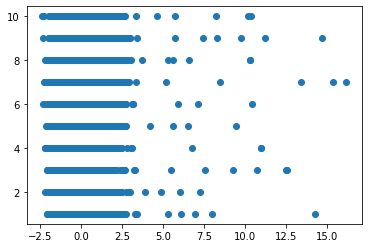

In [62]:
import matplotlib.pyplot as plt

plt.scatter(dataPCA, y)
plt.show()

In [64]:
X.shape

pca_X = PCA(n_components=1)
dataPCAX = pca_X.fit_transform(X)

In [ ]:
plt.scatter(dataPCA, y)
plt.show()

## GenericUnivariateSelect

Porque posso ir testando com varios valores

mode{‘percentile’, ‘k_best’, ‘fpr’, ‘fdr’, ‘fwe’}, default=’percentile’
